In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import time
import statistics

In [28]:
def normalize_minmax(df, min_val=-1, max_val=1):
    """
    Normalize a list of values to the specified range.
    Returns:
        list: The normalized values within the specified range.
    """
    normalized_df = df.copy()
    
    # Normalize numeric columns
    for column in normalized_df.select_dtypes(include=['number']).columns:
        min_data = normalized_df[column].min()
        max_data = normalized_df[column].max()

        if min_data == max_data:
            raise ValueError(f"All values in column '{column}' are equal. Cannot normalize.")

        normalized_df[column] = (normalized_df[column] - min_data) / (max_data - min_data) * (max_val - min_val) + min_val
    
    return normalized_df

def one_hot_encode_categorical(df):
    """
    Perform one-hot encoding on categorical columns in a DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with categorical columns one-hot encoded.
    """
    # Select only non-numerical (categorical) columns
    numerical_data_types = ['number', 'float']

    # Select only categorical columns (excluding numerical)
    categorical_columns = df.select_dtypes(exclude=numerical_data_types).columns
    
    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    df_encoded = df_encoded.astype('int64')
    
    return df_encoded

In [37]:
data=pd.read_csv('imputed_null_df.csv') 
columns_to_drop = ['Cookie_test', 'final_text','File']
data.drop(columns=columns_to_drop, inplace=True)
final_data=data.sample(frac=1,random_state=10).reset_index(drop=True)
print(data.head())

   Dementia  Error Type 1  Error Type 2  Age  Gender  MMSE  vocabulary  \
0         1             7             6   59    male    11          42   
1         1             5             4   56    male    20          57   
2         1             0             2   53    male    23          27   
3         1             1             0   55    male    19          16   
4         1             1             1   73  female    19          33   

    lex_div  key_words  main idea 1  main idea 2  main idea 3  main idea 4  \
0  0.154982         15     0.532677     0.547802     0.511399     0.259768   
1  0.142500         13     0.532677     0.352008     0.511399     0.259768   
2  0.155172         11     0.532677     0.547802     0.511399     0.242183   
3  0.098765          3     0.124406     0.137867     0.133700     0.149685   
4  0.129412         12     0.532677     0.352008     0.511399     0.230807   

   main idea 5  main idea 6  main idea 7  count main used  Education level  
0     0.5

In [33]:
# Create a Boolean mask for missing values (True for missing, False for non-missing)
missing_values = final_data.isnull()

# Count the number of missing values per attribute (column) using sum()
null_counts = missing_values.sum()

# Print the null counts per attribute
print(null_counts)

Dementia           0
Error Type 1       0
Error Type 2       0
Age                0
Gender             0
MMSE               0
vocabulary         0
lex_div            0
key_words          0
main idea 1        0
main idea 2        0
main idea 3        0
main idea 4        0
main idea 5        0
main idea 6        0
main idea 7        0
count main used    0
Education level    0
dtype: int64


In [39]:
df_encoded = pd.get_dummies(final_data, columns=["Gender"])
data=normalize_minmax(df_encoded)#Datos normalizados
print(data.head())

   Dementia  Error Type 1  Error Type 2       Age      MMSE  vocabulary  \
0      -1.0     -1.000000     -0.571429 -0.090909  1.000000   -0.303571   
1      -1.0     -1.000000     -1.000000 -0.272727  1.000000   -0.339286   
2      -1.0     -1.000000     -1.000000 -0.954545  1.000000   -0.625000   
3       1.0     -0.666667     -0.714286  0.318182  0.103448   -0.714286   
4       1.0     -0.666667     -0.142857 -0.409091 -0.517241   -0.035714   

    lex_div  key_words  main idea 1  main idea 2  main idea 3  main idea 4  \
0 -0.432501    -0.5625     1.000000     0.059575     1.000000     1.000000   
1 -0.422496    -0.1875     1.000000     0.845608     1.000000    -0.222301   
2 -0.556073    -0.5000     1.000000     0.845608     1.000000    -0.510461   
3 -0.364765    -0.1875     0.864821     0.060408     1.000000    -0.835619   
4 -0.704850    -0.3750    -0.517683     0.279158    -0.700503     1.000000   

   main idea 5  main idea 6  main idea 7  count main used  Education level  \
0 

C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\marco\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

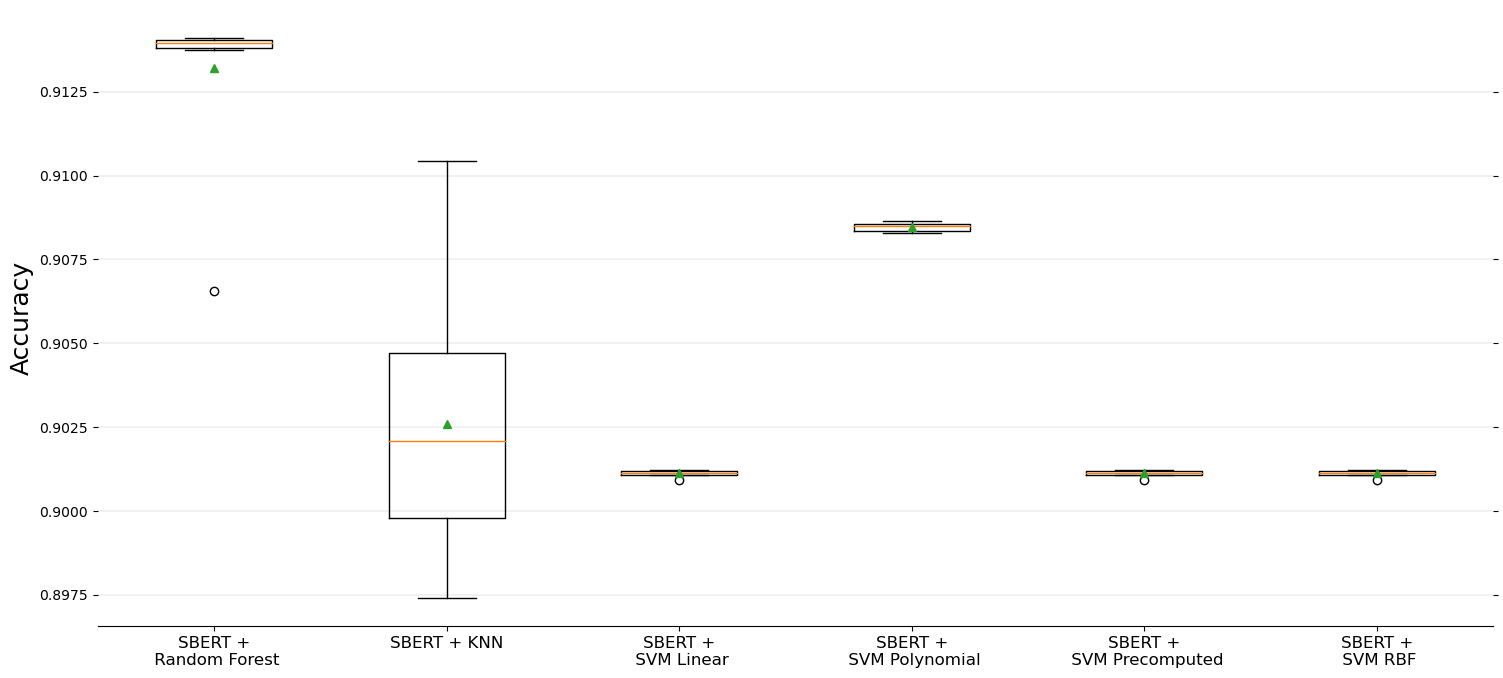

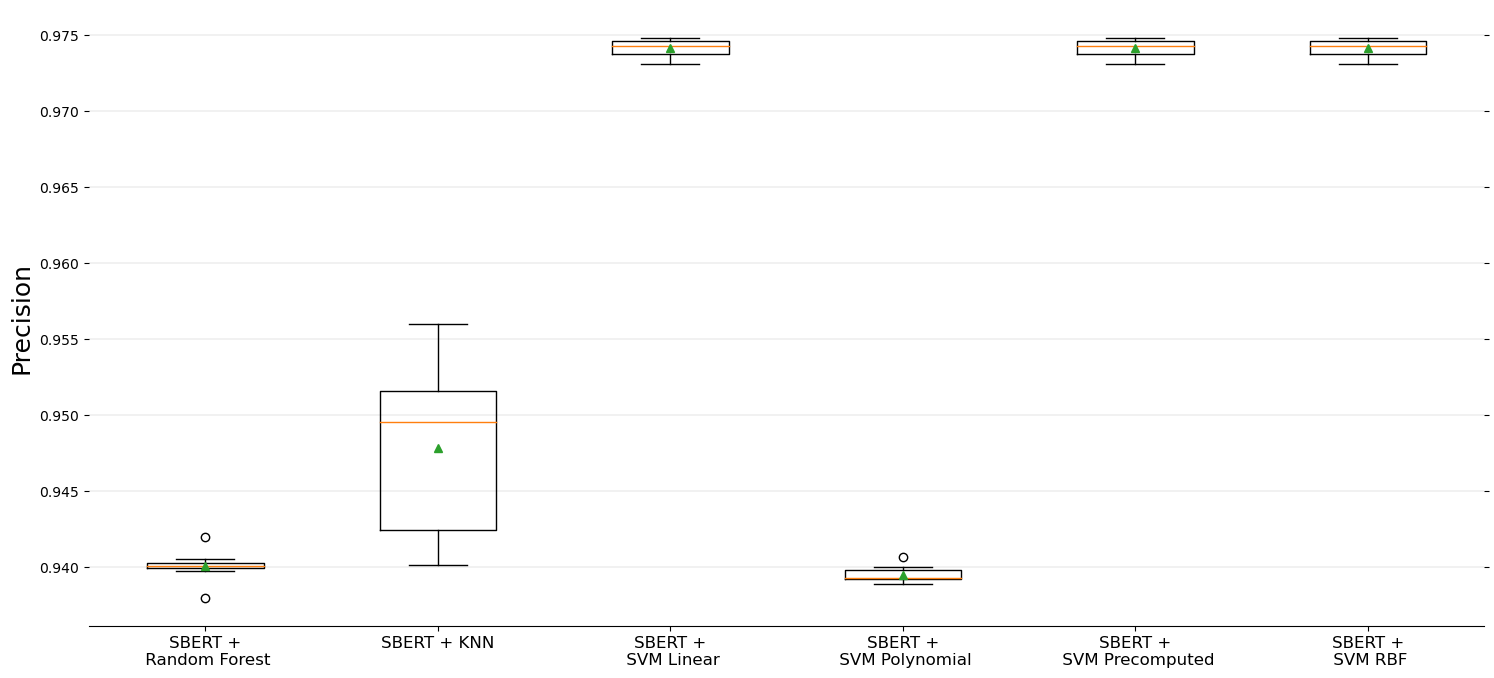

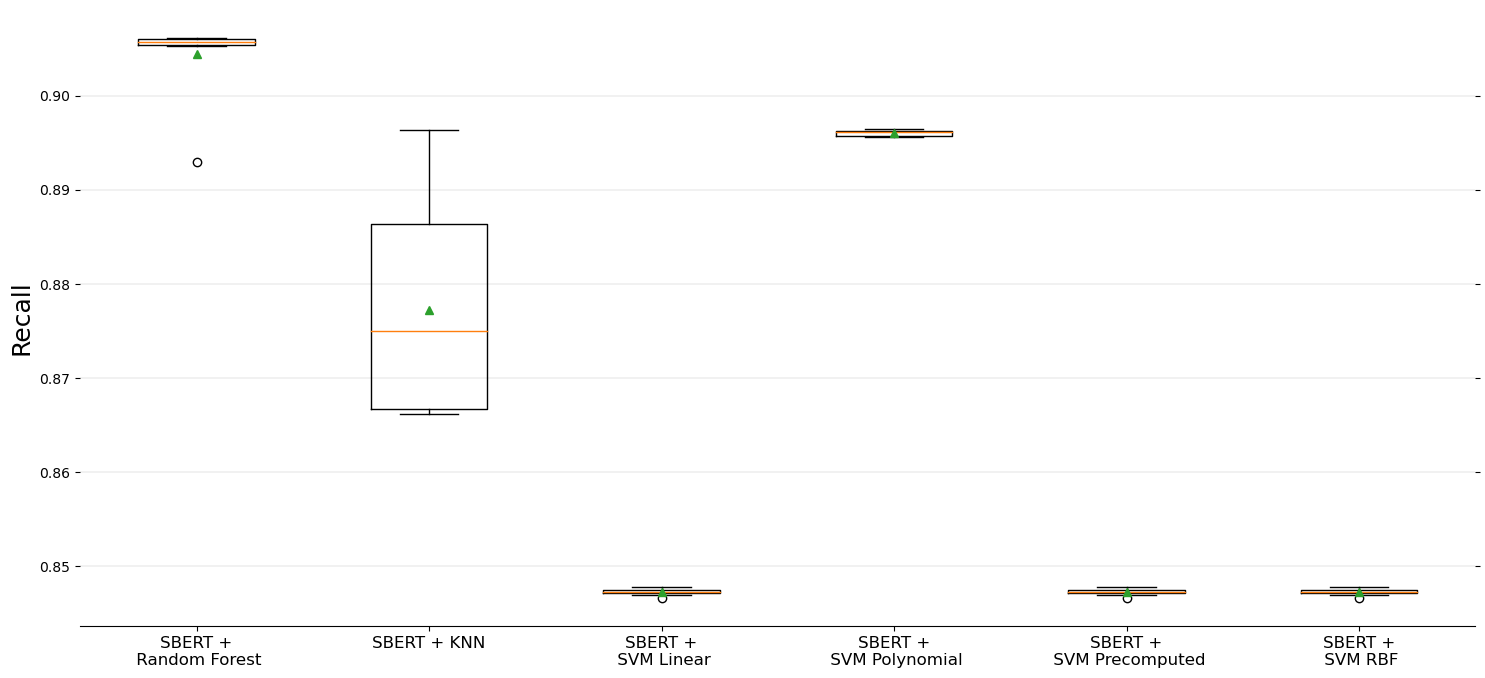

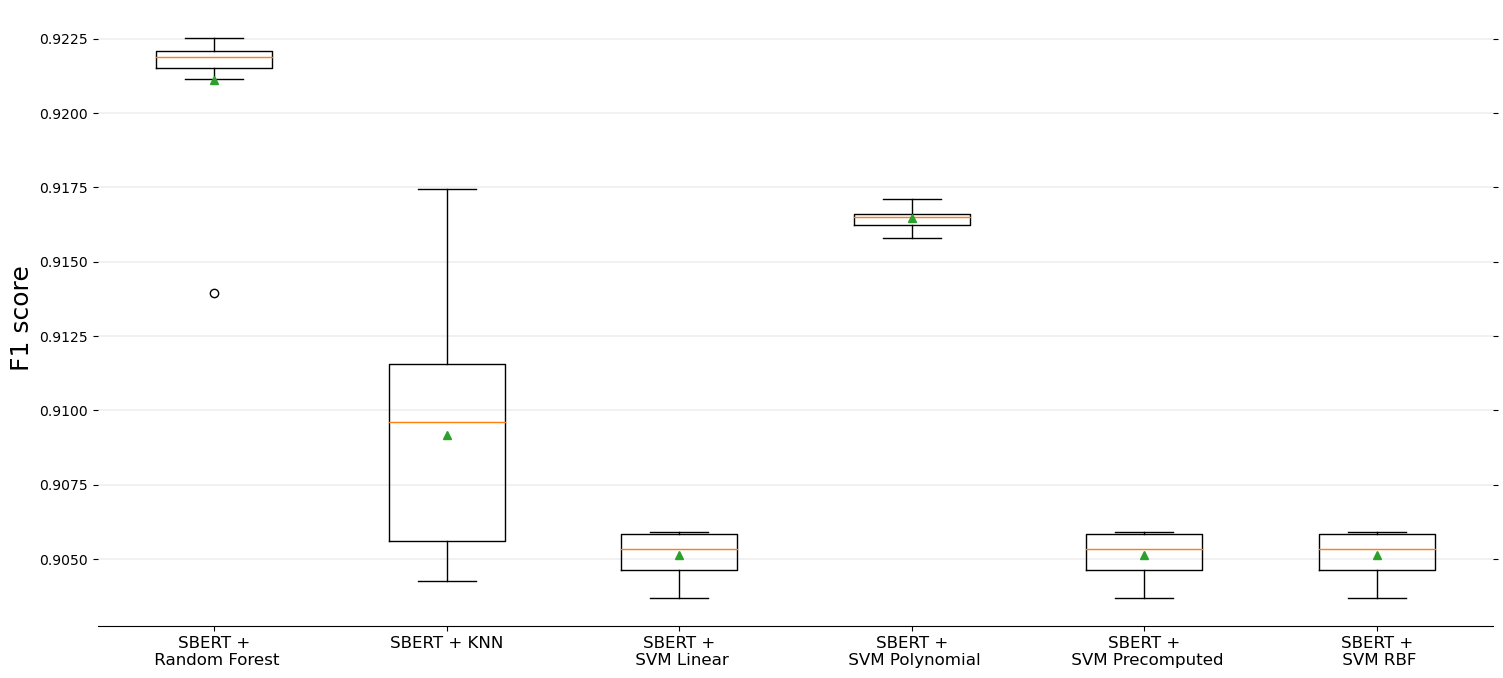

In [73]:
demens_target=data['Dementia']
# Caracteristicas
demens_dta=data[['Age', 'Education level', 'Error Type 1', 'Error Type 2',
        'vocabulary', 'lex_div','key_words', 'main idea 1',
       'main idea 2', 'main idea 3', 'main idea 5',
       'main idea 6', 'main idea 7','count main used']]
skf = StratifiedKFold(n_splits=10,shuffle=True)
skf.get_n_splits(demens_dta, demens_target)

metrics_clas=[]
time_clas=[]
for j in range(10):
    ###### Clasificacion 
    Racu_knn=[]
    Rpre_knn=[]
    Rrcal_knn=[]
    Rf1_knn=[]
    Rfb_knn=[]
    
    Racu_rf=[]
    Rpre_rf=[]
    Rrcal_rf=[]
    Rf1_rf=[]
    Rfb_rf=[]
    
    Racu_svm_line=[]
    Rpre_svm_line=[]
    Rrcal_svm_line=[]
    Rf1_svm_line=[]
    Rfb_svm_line=[]
    
    Racu_svm_pre=[]
    Rpre_svm_pre=[]
    Rrcal_svm_pre=[]
    Rf1_svm_pre=[]
    Rfb_svm_pre=[]
    
    Racu_svm_poly=[]
    Rpre_svm_poly=[]
    Rrcal_svm_poly=[]
    Rf1_svm_poly=[]
    Rfb_svm_poly=[]
    
    Racu_svm_rbf=[]
    Rpre_svm_rbf=[]
    Rrcal_svm_rbf=[]
    Rf1_svm_rbf=[]
    Rfb_svm_rbf=[]
    
    model_time_knn=[]
    model_time_rf=[]
    model_time_svm_l=[]
    model_time_svm_p=[]
    model_time_svm_pre=[]
    model_time_svm_rbf=[]
    skf = StratifiedKFold(n_splits=10,shuffle=True)
    skf.get_n_splits(demens_dta, demens_target)
    ### Seleccion de datos de entrenamiento y prueba respecto a los kfold 
    for train_index, test_index in skf.split(demens_dta, demens_target):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = demens_dta.loc[train_index], demens_dta.loc[test_index]
        y_train, y_test = demens_target.loc[train_index], demens_target.loc[test_index]
        
        #MODELS
        
        ############            KNN
        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=30)
        t0=time.time()
        #Train the model using the training sets
        knn.fit(X_train, y_train)
        #Predict the response for test dataset
        y_pred = knn.predict(X_test)
    
        model_time_knn.append(time.time()-t0)
        # Model Accuracy
        Acu_knn=metrics.accuracy_score(y_test, y_pred)
        Pre_knn=metrics.precision_score(y_test, y_pred)
        Rcall_knn=metrics.recall_score(y_test, y_pred)
        F1_knn=metrics.f1_score(y_test, y_pred)
        Fb_knn=metrics.fbeta_score(y_test, y_pred, beta=2)
        # STORE RESULTS
        Racu_knn.append(Acu_knn)
        Rpre_knn.append(Pre_knn)
        Rrcal_knn.append(Rcall_knn)
        Rf1_knn.append(F1_knn)
        Rfb_knn.append(Fb_knn)
        con_mat=confusion_matrix(y_test, y_pred)
         
       #############        Random Forest   
        
        # creating a RF classifier
        clf = RandomForestClassifier(max_depth=6, n_estimators = 30)  
        t0=time.time() 
        # Training the model on the training dataset
        clf.fit(X_train, y_train)
    
        # performing predictions on the test dataset
    
        y_pred2 = clf.predict(X_test)
        model_time_rf.append(time.time()-t0)
        
        # Model Accuracy
        Acu_RF=metrics.accuracy_score(y_test, y_pred2)
        Pre_RF=metrics.precision_score(y_test, y_pred2)
        Rcall_RF=metrics.recall_score(y_test, y_pred2)
        F1_RF=metrics.f1_score(y_test, y_pred2)
        Fb_RF=metrics.fbeta_score(y_test, y_pred2, beta=2)
        # Store results
        Racu_rf.append(Acu_RF)
        Rpre_rf.append(Pre_RF)
        Rrcal_rf.append(Rcall_RF)
        Rf1_rf.append(F1_RF)
        Rfb_rf.append(Fb_RF)
        
        ######## SVM Line
        
        clf = svm.SVC(kernel='linear') # Linear Kernel
    
        #Train the model using the training sets
        t0=time.time()
        clf.fit(X_train, y_train)
       
        #Predict the response for test dataset
       
        y_pred6 = clf.predict(X_test)
        model_time_svm_l.append(time.time()-t0)
        # Model Accuracy: how often is the classifier correct?
        Acu_SVM_line=metrics.accuracy_score(y_test, y_pred6)
        Pre_SVM_line=metrics.precision_score(y_test, y_pred6)
        Rcall_SVM_line=metrics.recall_score(y_test, y_pred6)
        F1_SVM_line=metrics.f1_score(y_test, y_pred6)
        Fb_SVM_line=metrics.fbeta_score(y_test, y_pred6, beta=2)
        # Store results
        Racu_svm_line.append(Acu_SVM_line)
        Rpre_svm_line.append(Pre_SVM_line)
        Rrcal_svm_line.append(Rcall_SVM_line)
        Rf1_svm_line.append(F1_SVM_line)
        Rfb_svm_line.append(Fb_SVM_line)
        
        
        ######## SVM PRECOMPUTED
        
        #Create a svm Classifier
        clf = svm.SVC(kernel='precomputed') # Linear Kernel
        
        #Train the model using the training sets
        t0=time.time()
        gram_train = np.dot(X_train, X_train.T)
        clf.fit(gram_train, y_train)
       
        gram_test = np.dot(X_test, X_train.T)
        #Predict the response for test dataset
        y_pred3 = clf.predict(gram_test)
        model_time_svm_pre.append(time.time()-t0)
        # Model Accuracy: how often is the classifier correct?
        Acu_SVM_prec=metrics.accuracy_score(y_test, y_pred3)
        Pre_SVM_prec=metrics.precision_score(y_test, y_pred3)
        Rcall_SVM_prec=metrics.recall_score(y_test, y_pred3)
        F1_SVM_prec=metrics.f1_score(y_test, y_pred3)
        Fb_SVM_prec=metrics.fbeta_score(y_test, y_pred3, beta=2)
        # Store results
        Racu_svm_pre.append(Acu_SVM_prec)
        Rpre_svm_pre.append(Pre_SVM_prec)
        Rrcal_svm_pre.append(Rcall_SVM_prec)
        Rf1_svm_pre.append(F1_SVM_prec)
        Rfb_svm_pre.append(Fb_SVM_prec)
        
        ######## SVM Polynomial
        
        clf = svm.SVC(kernel='poly', degree=2) # Linear Kernel
    
        #Train the model using the training sets
        t0=time.time()
        clf.fit(X_train, y_train)
       
        #Predict the response for test dataset
        
        y_pred4 = clf.predict(X_test)
        model_time_svm_p.append(time.time()-t0)
        # Model Accuracy: how often is the classifier correct?
        Acu_SVM_poly=metrics.accuracy_score(y_test, y_pred4)
        Pre_SVM_poly=metrics.precision_score(y_test, y_pred4)
        Rcall_SVM_poly=metrics.recall_score(y_test, y_pred4)
        F1_SVM_poly=metrics.f1_score(y_test, y_pred4)
        Fb_SVM_poly=metrics.fbeta_score(y_test, y_pred4, beta=2)
        # Store results
        Racu_svm_poly.append(Acu_SVM_poly)
        Rpre_svm_poly.append(Pre_SVM_poly)
        Rrcal_svm_poly.append(Rcall_SVM_poly)
        Rf1_svm_poly.append(F1_SVM_poly)
        Rfb_svm_poly.append(Fb_SVM_poly)
        
        ######## SVM rbf
        
        clf = svm.SVC(kernel='rbf') # Linear Kernel
    
        #Train the model using the training sets
        t0=time.time()
        clf.fit(X_train, y_train)
      
        #Predict the response for test dataset
    
        y_pred5 = clf.predict(X_test)
        model_time_svm_rbf.append(time.time()-t0)
        # Model Accuracy: how often is the classifier correct?
        Acu_SVM_rbf=metrics.accuracy_score(y_test, y_pred5)
        Pre_SVM_rbf=metrics.precision_score(y_test, y_pred5)
        Rcall_SVM_rbf=metrics.recall_score(y_test, y_pred5)
        F1_SVM_rbf=metrics.f1_score(y_test, y_pred5)
        Fb_SVM_rbf=metrics.fbeta_score(y_test, y_pred5, beta=2)
        # Store results
        Racu_svm_rbf.append(Acu_SVM_rbf)
        Rpre_svm_rbf.append(Pre_SVM_rbf)
        Rrcal_svm_rbf.append(Rcall_SVM_rbf)
        Rf1_svm_rbf.append(F1_SVM_rbf)
        Rfb_svm_rbf.append(Fb_SVM_rbf)
        
    model_time=[statistics.mean(model_time_knn),statistics.mean(model_time_rf),statistics.mean(model_time_svm_l),statistics.mean(model_time_svm_p),statistics.mean(model_time_svm_pre),statistics.mean(model_time_svm_rbf)]
# Almacenamiento de metricas 
    # acu_metric=[statistics.mean(Racu_rf),statistics.mean(Racu_knn),statistics.mean(Racu_svm_line),statistics.mean(Racu_svm_pre),statistics.mean(Racu_svm_poly),statistics.mean(Racu_svm_rbf)]
    # pres_metric=[statistics.mean(Rpre_rf),statistics.mean(Rpre_knn),statistics.mean(Rpre_svm_line),statistics.mean(Rpre_svm_pre),statistics.mean(Rpre_svm_poly),statistics.mean(Rpre_svm_rbf)]
    # rcal_metric=[statistics.mean(Rrcal_rf),statistics.mean(Rrcal_knn),statistics.mean(Rrcal_svm_line),statistics.mean(Rrcal_svm_pre),statistics.mean(Rrcal_svm_poly),statistics.mean(Rrcal_svm_rbf)]
    # rf1_metric=[statistics.mean(Rf1_rf),statistics.mean(Rf1_knn),statistics.mean(Rf1_svm_line),statistics.mean(Rf1_svm_pre),statistics.mean(Rf1_svm_poly),statistics.mean(Rf1_svm_rbf)]
    # #rfb_metric=[statistics.mean(Rfb_rf,Rfb_knn,Rfb_svm_line,Rfb_svm_pre,Rfb_svm_poly,Rfb_svm_rbf]
    
    # metrics_classs=[acu_metric,pres_metric,rcal_metric,rf1_metric]#,rfb_metric
    metrics_rf=[statistics.mean(Racu_rf),statistics.mean(Rpre_rf),statistics.mean(Rrcal_rf),statistics.mean(Rf1_rf)]
    metrics_knn=[statistics.mean(Racu_knn),statistics.mean(Rpre_knn),statistics.mean(Rrcal_knn),statistics.mean(Rf1_knn)]
    metrics_svm_line=[statistics.mean(Racu_svm_line),statistics.mean(Rpre_svm_line),statistics.mean(Rrcal_svm_line),statistics.mean(Rf1_svm_line)]
    metrics_svm_pre=[statistics.mean(Racu_svm_pre),statistics.mean(Rpre_svm_pre),statistics.mean(Rrcal_svm_pre),statistics.mean(Rf1_svm_pre)]
    metrics_svm_poly=[statistics.mean(Racu_svm_poly),statistics.mean(Rpre_svm_poly),statistics.mean(Rrcal_svm_poly),statistics.mean(Rf1_svm_poly)]
    metrics_svm_rbf=[statistics.mean(Racu_svm_rbf),statistics.mean(Rpre_svm_rbf),statistics.mean(Rrcal_svm_rbf),statistics.mean(Rf1_svm_rbf)]

    metrics_classs=[metrics_rf, metrics_knn, metrics_svm_line,metrics_svm_poly, metrics_svm_pre, metrics_svm_rbf]
    metrics_clas.append(metrics_classs)
    time_clas.append(statistics.mean(model_time))

# In[]
rf=[]
knn=[]
svm_l=[]
svm_p=[]
svm_pre=[]
svm_rbf=[]
for i in range(len(metrics_clas)):
    rf.append(metrics_clas[i][0])
    knn.append(metrics_clas[i][1])
    svm_l.append(metrics_clas[i][2])
    svm_p.append(metrics_clas[i][3])
    svm_pre.append(metrics_clas[i][4])
    svm_rbf.append(metrics_clas[i][5])
# In[]
rf_df=pd.DataFrame(rf)
knn_df=pd.DataFrame(knn)
svm_l_df=pd.DataFrame(svm_l)
svm_p_df=pd.DataFrame(svm_p)
svm_pre_df=pd.DataFrame(svm_pre)
svm_rbf_df=pd.DataFrame(svm_rbf)
# In[]
rf_avg=rf_df.mean()
knn_avg=knn_df.mean()
svm_l_avg=svm_l_df.mean()
svm_p_avg=svm_p_df.mean()
svm_pre_avg=svm_pre_df.mean()
svm_rbf_avg=svm_rbf_df.mean()
# In[]
#nn=pd.read_csv('C:/Users/Yam/Documents/Tesis/sts_nn.csv', header=[0]) 
# Informacion demografica 
#nn_10=pd.read_csv(r'C:/Users/Yam/Documents/Tesis/k10_10_nn.csv', header=[0]) 
#nn_10=nn_10[['0','1','2','3','4','5','6','7','8','9']].T
# In[]
#bert_accu=[0.73214287, 0.67272729, 0.81818181, 0.78181821, 0.80000001, 0.76363635,
          # 0.65454543, 0.78181821, 0.70909089, 0.78181821]

# In[]
#clas_mod=
accus=np.array([rf_df[0],knn_df[0],svm_l_df[0],svm_p_df[0],svm_pre_df[0],svm_rbf_df[0]]).T # bert_accu,
pres=np.array([rf_df[1],knn_df[1],svm_l_df[1],svm_p_df[1],svm_pre_df[1],svm_rbf_df[1]]).T
recal=np.array([rf_df[2],knn_df[2],svm_l_df[2],svm_p_df[2],svm_pre_df[2],svm_rbf_df[2]]).T
f1_s=np.array([rf_df[3],knn_df[3],svm_l_df[3],svm_p_df[3],svm_pre_df[3],svm_rbf_df[3]]).T
clas=[accus,pres,recal,f1_s]
# In[]
labels = ['Accuracy', 'Precision', 'Recall','F1 score'] 
clas_met = ['SBERT +\n Random Forest','SBERT + KNN','SBERT +\n SVM Linear','SBERT +\n SVM Polynomial', 'SBERT +\n SVM Precomputed', 'SBERT +\n SVM RBF']
for i in range(4):
   fig, ax = plt.subplots(figsize=(18,8),facecolor='w')
   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)
   ax.spines['left'].set_visible(False)
   # Remove y-axis tick marks
   ax.yaxis.set_ticks_position('default')
   # Add major gridlines in the y-axis
   ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.30, alpha=0.5)
   # Set plot title
   
   #ax.set_title("Accuracy in Classification Task",fontsize=18)
   ax.boxplot(clas[i], labels=clas_met,showmeans=True)
   ax.set_xticklabels(clas_met, fontsize=12)
   ax.set_ylabel(labels[i],fontsize=18)
   plt.show()


metrics_df = pd.DataFrame(metrics_classs, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Save the DataFrame to a CSV file
metrics_df.to_csv('classification_metrics.csv', index=False)

In [63]:
import pandas as pd
from scipy import stats

# Specify the binary target variable name and labels
target_variable = 'Dementia'
positive_label = 1
negative_label = -1

# Define the significance level
alpha = 0.05

# Create an empty DataFrame to store the results
t_test_results = pd.DataFrame(columns=['Attribute', 'T-Statistic', 'P-Value', 'Significant'])

# Iterate through the numerical attributes
numerical_attributes = data.select_dtypes(include=['number']).columns
for attribute in numerical_attributes:
    group0 = data[data[target_variable] == negative_label][attribute]
    group1 = data[data[target_variable] == positive_label][attribute]

    # Perform the T-Test
    t_statistic, p_value = stats.ttest_ind(group0, group1)

    # Determine significance
    significant = 'Yes' if p_value < alpha else 'No'

    # Append the results to the DataFrame
    t_test_results = t_test_results.append({'Attribute': attribute, 'T-Statistic': t_statistic, 'P-Value': p_value, 'Significant': significant}, ignore_index=True)

# Sort the results by P-Value in ascending order (most significant first)
t_test_results = t_test_results.sort_values(by='P-Value')

# Display the sorted table
print(t_test_results)


          Attribute  T-Statistic       P-Value Significant
0          Dementia         -inf  0.000000e+00         Yes
4              MMSE    24.208333  2.074051e-88         Yes
3               Age    -9.909772  2.154437e-21         Yes
7         key_words     6.928386  1.207176e-11         Yes
15  count main used     6.486947  1.970914e-10         Yes
16  Education level     5.713693  1.822316e-08         Yes
1      Error Type 1    -5.509214  5.568749e-08         Yes
13      main idea 6     5.097665  4.753412e-07         Yes
8       main idea 1     4.256723  2.443366e-05         Yes
2      Error Type 2    -4.113333  4.503446e-05         Yes
12      main idea 5     3.916882  1.011166e-04         Yes
14      main idea 7     3.713118  2.258309e-04         Yes
10      main idea 3     3.519738  4.681689e-04         Yes
6           lex_div     3.422793  6.664662e-04         Yes
9       main idea 2     3.392966  7.417321e-04         Yes
5        vocabulary     2.970295  3.106491e-03         Y

C:\Users\marco\AppData\Local\Temp\ipykernel_31288\1855757185.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(group0, group1)
C:\Users\marco\AppData\Local\Temp\ipykernel_31288\1855757185.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({'Attribute': attribute, 'T-Statistic': t_statistic, 'P-Value': p_value, 'Significant': significant}, ignore_index=True)
C:\Users\marco\AppData\Local\Temp\ipykernel_31288\1855757185.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_test_results = t_test_results.append({'Attribute': attribute, 'T-Statistic': t_statistic, 'P-Value': p_value, 'Significant': significant

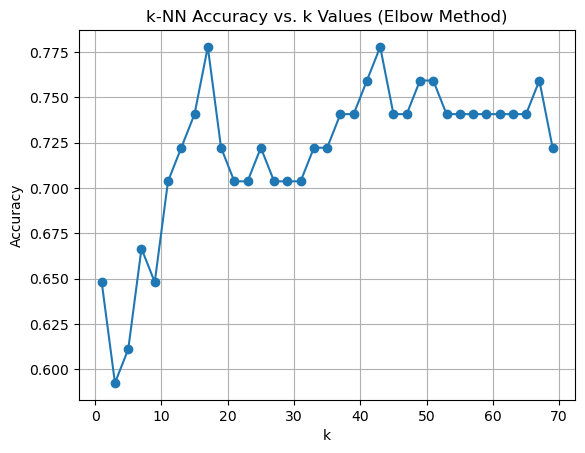

Best k value: 17


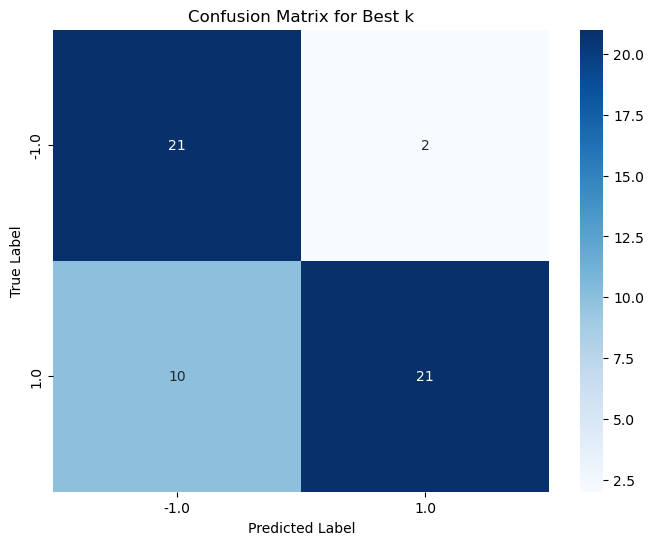

In [72]:
def KNN(x_train,y_train,x_test,y_test):
    """
    Performs KNN algorithm to classify a DataFrame.

    Returns:
        Elbow method results
        Confusion matrix of test classification with optimal k
    """
      # Calculate the number of unique values in y_train to determine k_values
    unique_values_count = len(np.unique(y_train))
    
    # Create an array of k values that are not multiples of the unique_values_count
    k_values = [k for k in range(1, 71) if k % unique_values_count != 0]

    # Initialize arrays to store accuracy and confusion matrix
    accuracy_scores = []
    confusion_matrices = []

    for k in k_values:
        predictions = []

        for test_point in x_test.values:
            distances = []

            # Calculate Euclidean distance between the test point and all training points
            for train_point in x_train.values:
                distance = np.linalg.norm(test_point - train_point)
                distances.append(distance)

            # Get indices of k-nearest neighbors
            k_indices = np.argsort(distances)[:k]

            # Get labels of k-nearest neighbors
            k_nearest_labels = [y_train.iloc[i] for i in k_indices]

            # Predict the class based on majority vote
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(prediction)

        correct = sum(1 for true, pred in zip(y_test, predictions) if true == pred)
        accuracy= correct / len(y_test)
        accuracy_scores.append(accuracy)

        # Calculate confusion matrix and store it
        confusion = confusion_matrix(y_test, predictions)
        confusion_matrices.append(confusion)

    # Plot the accuracy results vs. k values (elbow method)
    plt.plot(k_values, accuracy_scores, marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('k-NN Accuracy vs. k Values (Elbow Method)')
    plt.grid(True)
    plt.show()

    # Find the index of the highest accuracy
    best_k_index = np.argmax(accuracy_scores)
    best_k = k_values[best_k_index]

    # Print the best k value and its corresponding confusion matrix
    print(f'Best k value: {best_k}')
    
    # Create a prettier confusion matrix with labeled axes
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrices[best_k_index], annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Best k')
    plt.show()

KNN(X_train,y_train,X_test,y_test)